In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.gridspec as gridspec
from numpy import random
import scipy.stats as scipy

In [14]:
from IPython.display import display


In [15]:
from sklearn.metrics import accuracy_score

with sqlite3.connect('C:/Users/Thoma/OneDrive/Desktop/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    tempmatch = pd.read_sql_query("SELECT * from Match", con)
    matches3 = matches2 = matches

In [16]:
matches.tail()
#matches.describe()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [18]:
leagues


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [19]:
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [20]:
main_countries = ['England']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,country_id,name_y
0,1729,England,1729,England Premier League


In [22]:
req_matches = matches[matches.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches.dropna(inplace=True)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals
1728,1729,1729,10260,10261,1,1,2008/2009,2
1729,1730,1729,9825,8659,1,0,2008/2009,1
1730,1731,1729,8472,8650,0,1,2008/2009,1
1731,1732,1729,8654,8528,2,1,2008/2009,3
1732,1733,1729,10252,8456,4,2,2008/2009,6


In [23]:
def res(row):
    if row['home_team_goal'] == row['away_team_goal']:
        val = 0
    elif row['home_team_goal'] > row['away_team_goal']:
        val = 1
    else:
        val = -1
    return val

req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
1728,1729,1729,10260,10261,1,1,2008/2009,2,0
1729,1730,1729,9825,8659,1,0,2008/2009,1,1
1730,1731,1729,8472,8650,0,1,2008/2009,1,-1
1731,1732,1729,8654,8528,2,1,2008/2009,3,1
1732,1733,1729,10252,8456,4,2,2008/2009,6,1


In [27]:
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
english = new_matches[new_matches.name == "England"]

display(english.tail())

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
3035,1729,8466,8197,2,2,2015/2016,4,0,England,England Premier League
3036,1729,10003,10194,0,1,2015/2016,1,-1,England,England Premier League
3037,1729,8586,8650,0,0,2015/2016,0,0,England,England Premier League
3038,1729,9817,9825,0,3,2015/2016,3,-1,England,England Premier League
3039,1729,8659,8472,1,0,2015/2016,1,1,England,England Premier League


In [29]:
e = english.groupby('season')

seasons

display(e.tail(2))


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
378,1729,8528,10252,0,4,2008/2009,4,-1,England,England Premier League
379,1729,8455,8650,0,1,2008/2009,1,-1,England,England Premier League
758,1729,8462,8586,1,2,2009/2010,3,-1,England,England Premier League
759,1729,9825,8658,3,1,2009/2010,4,1,England,England Premier League
1138,1729,8528,8559,1,1,2010/2011,2,0,England,England Premier League
1139,1729,8455,8602,2,0,2010/2011,2,1,England,England Premier League
1518,1729,10172,8455,1,0,2011/2012,1,1,England,England Premier League
1519,1729,8602,10003,2,2,2011/2012,4,0,England,England Premier League
1898,1729,10194,8472,0,0,2012/2013,0,0,England,England Premier League
1899,1729,8528,8654,2,1,2012/2013,3,1,England,England Premier League


array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

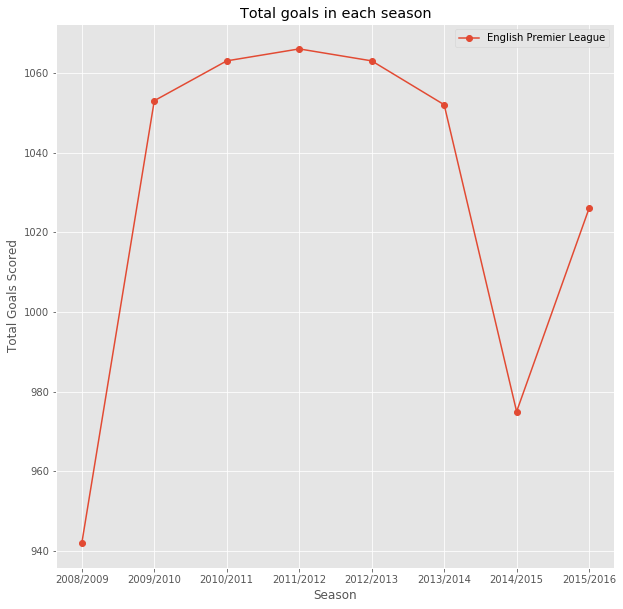

In [31]:
fig = plt.figure(figsize=(10, 10))
plt.title("Total goals in each season")
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.ylabel("Total Goals Scored")
num_seasons = range(len(seasons))

plt.plot(num_seasons,e.total_goals.sum().values,label = "English Premier League", marker = 'o')
plt.legend()
seasons

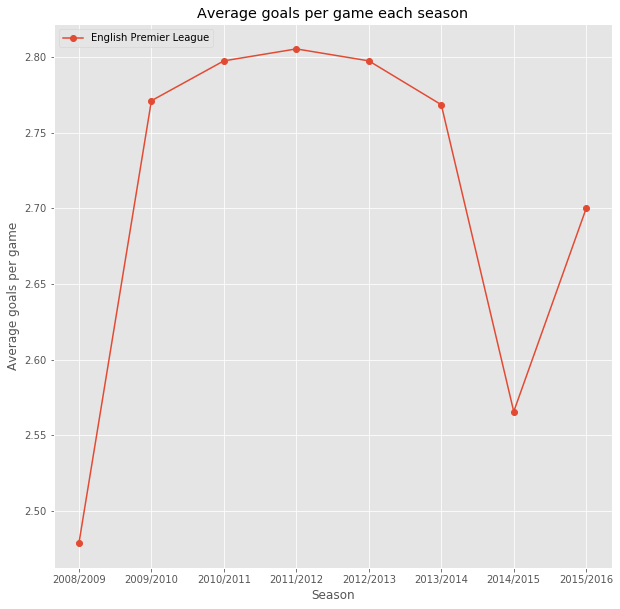

In [32]:
#Plotting average goals scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.title("Average goals per game each season")
plt.ylabel("Average goals per game")

plt.plot(num_seasons,e.total_goals.mean().values,label = "English Premier League", marker = 'o')
plt.legend(loc = 2)

In [33]:
average_goals_english = english.total_goals.mean()
print("{:.2}".format(average_goals_english))

2.7


In [34]:
#Merging Home team and matches

matches_h_teams = pd.merge(new_matches,teams,left_on='home_team_api_id', right_on='team_api_id')
matches_h_teams = matches_h_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_h_teams = matches_h_teams.rename(columns={'team_long_name':'home_team_long_name','name_y':'league_name','name':'country_name'})
matches_h_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,home_team_long_name,team_short_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League,Manchester United,MUN
1,1729,10260,8654,2,0,2008/2009,2,1,England,England Premier League,Manchester United,MUN
2,1729,10260,8667,4,3,2008/2009,7,1,England,England Premier League,Manchester United,MUN
3,1729,10260,10194,5,0,2008/2009,5,1,England,England Premier League,Manchester United,MUN
4,1729,10260,8472,1,0,2008/2009,1,1,England,England Premier League,Manchester United,MUN


Text(0.5, 0, 'Team name')

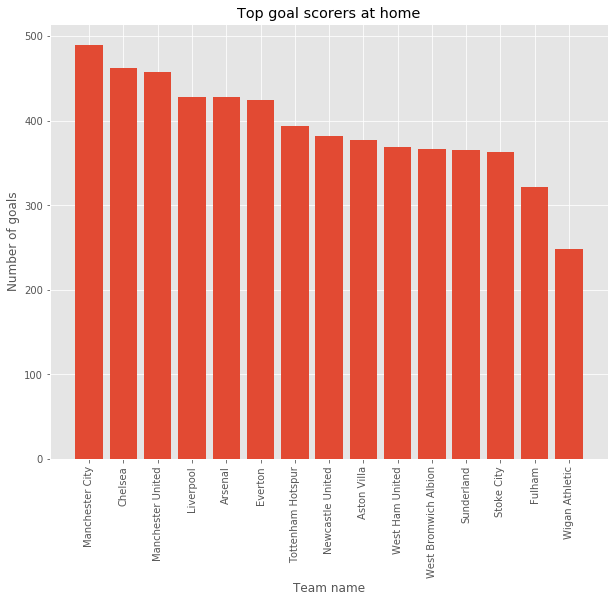

In [36]:
top_goal_scorers_home = matches_h_teams.groupby('home_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_home.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_home.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_home.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at home")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [37]:
#Merging Away team and matches

matches_a_teams = pd.merge(new_matches,teams,left_on='away_team_api_id', right_on='team_api_id')
matches_a_teams = matches_a_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_a_teams = matches_a_teams.rename(columns={'team_long_name':'away_team_long_name','name_y':'league_name','name':'country_name'})
matches_a_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,away_team_long_name,team_short_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League,Newcastle United,NEW
1,1729,9879,10261,2,1,2008/2009,3,1,England,England Premier League,Newcastle United,NEW
2,1729,8455,10261,0,0,2008/2009,0,0,England,England Premier League,Newcastle United,NEW
3,1729,8549,10261,0,0,2008/2009,0,0,England,England Premier League,Newcastle United,NEW
4,1729,8462,10261,0,3,2008/2009,3,-1,England,England Premier League,Newcastle United,NEW


Text(0.5, 0, 'Team name')

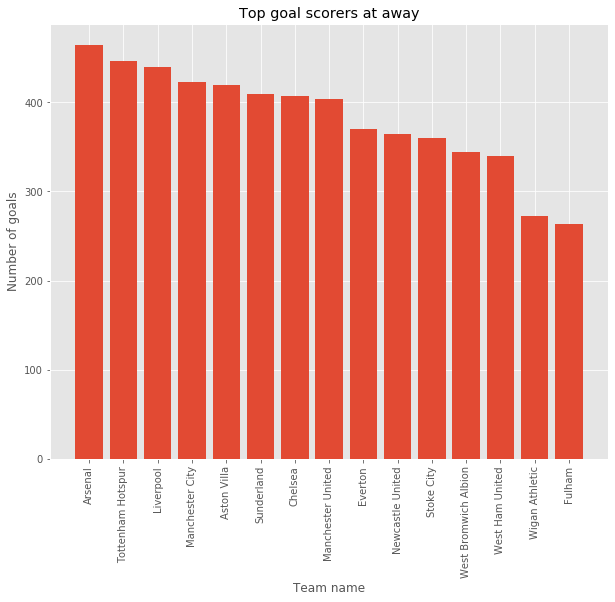

In [38]:
top_goal_scorers_away = matches_a_teams.groupby('away_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_away.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_away.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_away.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at away")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [39]:
#select fields
matches = matches3[matches3.league_id.isin(leagues.id)]
matches = matches[['id', 'country_id' ,'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','B365H', 'B365D' ,'B365A']]
matches.dropna(inplace=True)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,5.5,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,6.5,15.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,5.50,3.6,1.67
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,1.91,3.4,4.20
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,1.91,3.4,4.33


In [40]:
from scipy.stats import entropy

def match_entropy(row):
    odds = [row['B365H'],row['B365D'],row['B365A']]
    #change odds to probability
    probs = [1/o for o in odds]
    #normalize to sum to 1
    norm = sum(probs)
    probs = [p/norm for p in probs]
    return entropy(probs)

#compute match entropy
matches['entropy'] = matches.apply(match_entropy,axis=1)

In [41]:
#compute mean entropy for every league in every season
entropy_means = matches.groupby(('season','league_id')).entropy.mean()
entropy_means = entropy_means.reset_index().pivot(index='season', columns='league_id', values='entropy')
entropy_means.columns = [leagues[leagues.id==x].name.values[0] for x in entropy_means.columns]
entropy_means.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


,England
season,
2008/2009,0.984556
2009/2010,0.956496
2010/2011,0.983258
2011/2012,0.969593
2012/2013,0.981472
2013/2014,0.960473
2014/2015,0.980301
2015/2016,0.997819


Text(7.3, 0.952, 'more predictable')

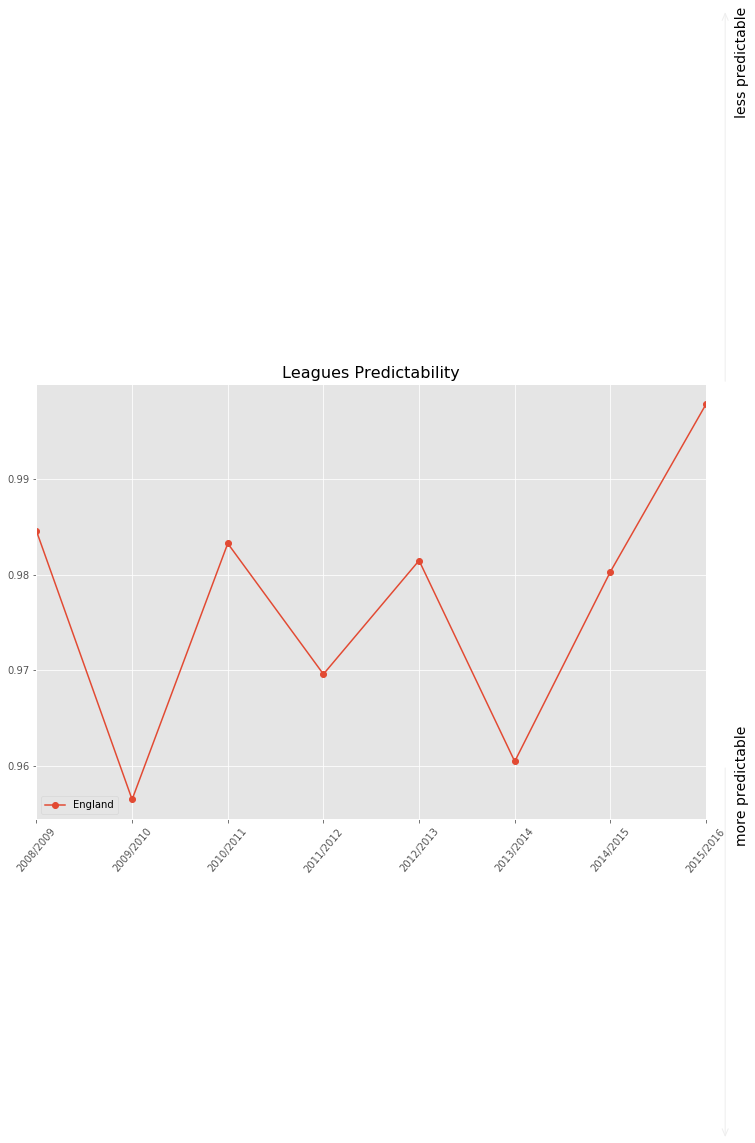

In [42]:
#plot graph
ax = entropy_means.plot(figsize=(12,8),marker='o')

#set title
plt.title('Leagues Predictability', fontsize=16)

#set ticks roatation
plt.xticks(rotation=50)

#keep colors for next graph
colors = [x.get_color() for x in ax.get_lines()]
colors_mapping = dict(zip(leagues.id,colors))

#remove x label
ax.set_xlabel('')

#locate legend 
plt.legend(loc='lower left')

#add arrows
ax.annotate('', xytext=(7.2, 1),xy=(7.2, 1.039),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('', xytext=(7.2, 0.96),xy=(7.2, 0.921),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('less predictable', xy=(7.3, 1.028), annotation_clip=False,fontsize=14,rotation='vertical')
ax.annotate('more predictable', xy=(7.3, 0.952), annotation_clip=False,fontsize=14,rotation='vertical')

#plt.savefig('figures/leagues_pred.png', bbox_inches='tight',dpi=600)

In [43]:

# Considering English Premier League

main_countries = ['England']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,name_y,country_id,name_y
0,1729,England,England,1729,England Premier League


In [44]:
#Merge the leagues with corresponding matches

req_matches = matches2[matches2.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.dropna(inplace=True)
req_matches.tail()


,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
4763,4764,1729,8466,8197,2,2,2015/2016,4,0
4764,4765,1729,10003,10194,0,1,2015/2016,1,-1
4765,4766,1729,8586,8650,0,0,2015/2016,0,0
4766,4767,1729,9817,9825,0,3,2015/2016,3,-1
4767,4768,1729,8659,8472,1,0,2015/2016,1,1


In [46]:
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
scottish = new_matches[new_matches.name == "England"]

# sum_goals = new_group_matches.home_team_goal.sum()
e = english.groupby('season')
seasons
%matplotlib inline

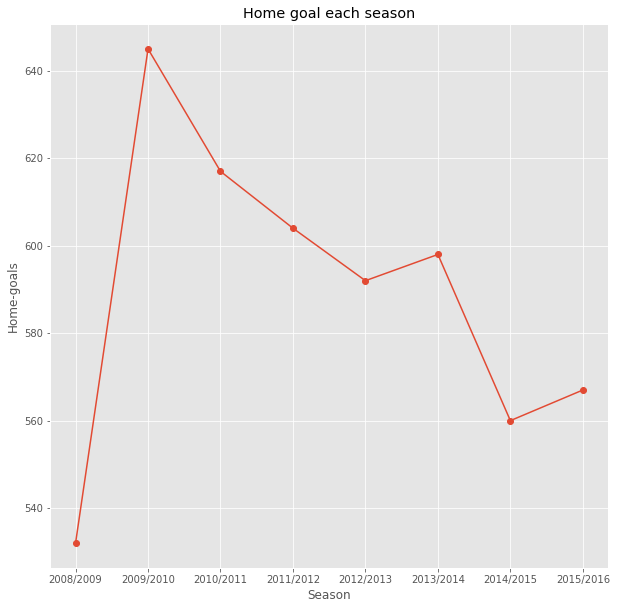

In [47]:
#Plotting home scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home goal each season')
plt.xlabel('Season')
plt.ylabel('Home-goals')
plt.plot(num_seasons,e.home_team_goal.sum().values,label = "English Premier League", marker = 'o')

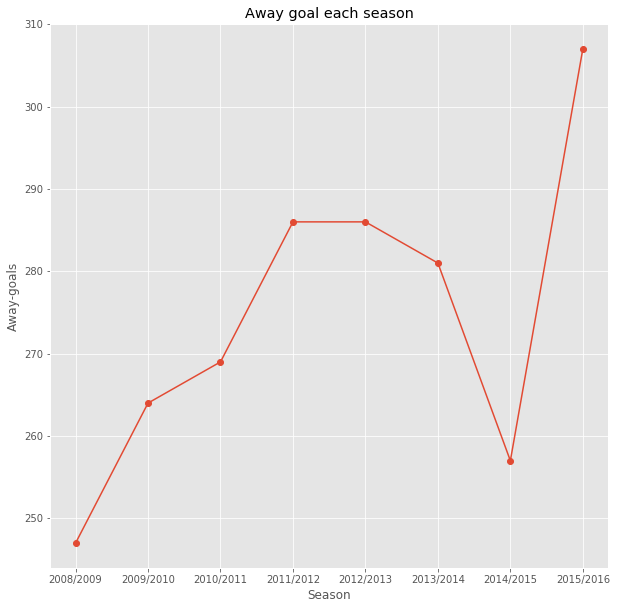

In [29]:
#Plotting away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Away goal each season')
plt.xlabel('Season')
plt.ylabel('Away-goals')
plt.plot(num_seasons,s.away_team_goal.sum().values,label = "English Premier League", marker = 'o')

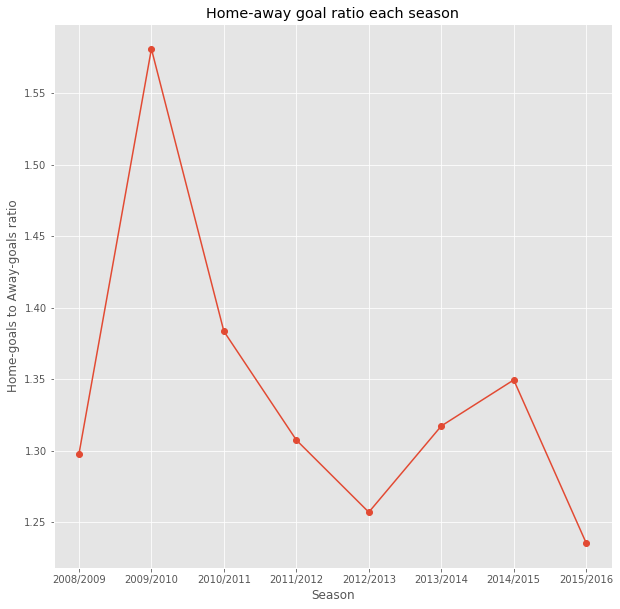

In [49]:
#Plotting home/away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home-away goal ratio each season')
plt.xlabel('Season')
plt.ylabel('Home-goals to Away-goals ratio')
plt.plot(num_seasons,e.home_team_goal.sum().values / e.away_team_goal.sum().values,label = "English Premier League", marker = 'o')

In [1]:
#Subsetting homewins vs homeloss from each of the leagues - ignoring draws.
s_hw = np.true_divide(english[english.result == 1].groupby('season').result.sum().values,english[english.result == -1].groupby('season').result.sum().values * -1)


#Plotting number of home wins vs home losses each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlim = (-20,20)
plt.ylim = (0,120)
plt.title("Number of home wins each vs home loss each season")
plt.xlabel("Season")
plt.ylabel("Home Wins vs loss")
plt.plot(num_seasons,s_hw,label = "England Premier League", marker = 'o')
display(s_hw)

NameError: name 'np' is not defined

In [51]:
# Read data from the CSV into a dataframe

raw_data_1 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2000-01.csv')
raw_data_2 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2001-02.csv')
raw_data_3 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2002-03.csv')
raw_data_4 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2003-04.csv')
raw_data_5 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2004-05.csv', encoding = "ISO-8859-1")
raw_data_6 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2005-06.csv')
raw_data_7 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2006-07.csv')
raw_data_8 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2007-08.csv')
raw_data_9 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2008-09.csv')
raw_data_10 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2009-10.csv')
raw_data_11 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2010-11.csv')
raw_data_12 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2011-12.csv')
raw_data_13 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2012-13.csv')
raw_data_14 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2013-14.csv')
raw_data_15 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2014-15.csv')
raw_data_16 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2015-16.csv')
raw_data_17 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2016-17.csv')


In [52]:
# Selecting the features

raw_data_1 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_2 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_3 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_4 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_5 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_6 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_7 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_8 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_9 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_10 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_11 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_12 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_13 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_14 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_15 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_16 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_17 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]


In [53]:
# Concating the data on one dataframe

playing_stat = pd.concat([raw_data_1,raw_data_2,raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7,raw_data_8,raw_data_9,raw_data_10,raw_data_11,raw_data_12,raw_data_13,raw_data_14,raw_data_15,raw_data_16,raw_data_17],ignore_index=True)

In [54]:
playing_stat.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
6455,Man City,Chelsea,1,2,A,1,1,D,3,9,1,3,22,18,8,7,4,2,0,0
6456,Middlesbrough,West Ham,2,1,H,2,1,H,19,11,7,5,13,15,5,6,0,0,0,0
6457,Newcastle,Aston Villa,3,0,H,2,0,H,9,5,5,1,10,14,5,1,0,5,1,1
6458,Southampton,Arsenal,3,2,H,0,1,A,11,8,7,5,17,10,7,5,1,2,0,0
6459,Tottenham,Man United,3,1,H,1,1,D,9,15,3,6,13,15,3,6,0,2,0,0


In [57]:
# Creating csv file from the merged dataframe

playing_stat.to_csv("C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/Merged_dataset.csv")

In [58]:
df = pd.read_csv("C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/Merged_dataset.csv")

In [59]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))

avg_home_scored = df.FTHG.sum() / 4332.0
avg_away_scored = df.FTAG.sum() / 4332.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_away_conceded)

2.3035549399815327


In [60]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

Series([], Name: Team, dtype: object)

In [61]:
table.Team = res_home.groups.keys()
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
#16/17 Home matches for each team each season and 19 seasons therefore 313.5 home matches and 304 away matches
table.HAS = (table.HGS / 313.5) / avg_home_scored
table.AAS = (table.AGS / 313.5) / avg_away_scored
table.HDS = (table.HGC / 313.5) / avg_home_conceded
table.ADS = (table.AGC / 313.5) / avg_away_conceded

table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,765,306,1.059315,0.614141,221,425,0.443547,0.588509
1,Aston Villa,459,323,0.635589,0.648260,340,391,0.682379,0.541428
2,Bradford,340,170,0.470807,0.341190,493,697,0.989450,0.965154
3,Charlton,527,323,0.729751,0.648260,323,646,0.648260,0.894533
4,Chelsea,748,408,1.035775,0.818855,340,425,0.682379,0.588509
5,Coventry,238,374,0.329565,0.750617,391,680,0.784736,0.941614
6,Derby,391,238,0.541428,0.477666,408,595,0.818855,0.823912
7,Everton,493,272,0.682670,0.545903,459,544,0.921212,0.753291
8,Ipswich,527,442,0.729751,0.887093,255,459,0.511785,0.635589
9,Leeds,612,476,0.847452,0.955331,357,374,0.716498,0.517888


In [62]:
table.Team

0           Arsenal
1       Aston Villa
2          Bradford
3          Charlton
4           Chelsea
5          Coventry
6             Derby
7           Everton
8           Ipswich
9             Leeds
10        Leicester
11        Liverpool
12         Man City
13       Man United
14    Middlesbrough
15        Newcastle
16      Southampton
17       Sunderland
18        Tottenham
19         West Ham
Name: Team, dtype: object

In [64]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:23]

#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS
0,Charlton,Man City,H,14,4,6,6,0.729751,0.648260,0.716498,0.800372
1,Chelsea,West Ham,H,10,5,7,7,1.035775,0.682379,0.716498,0.706210
2,Coventry,Middlesbrough,A,3,9,8,4,0.329565,0.784736,0.887093,0.494347
3,Derby,Southampton,D,4,6,5,8,0.541428,0.818855,0.443547,0.612049
4,Leeds,Everton,H,8,6,6,4,0.847452,0.716498,0.545903,0.753291
...,...,...,...,...,...,...,...,...,...,...,...
6455,Man City,Chelsea,A,1,3,8,7,0.470807,1.057688,0.818855,0.588509
6456,Middlesbrough,West Ham,H,7,5,5,6,0.423726,0.784736,0.716498,0.706210
6457,Newcastle,Aston Villa,H,5,1,5,1,0.612049,0.580022,0.648260,0.541428
6458,Southampton,Arsenal,H,7,5,7,5,0.635589,0.750617,0.614141,0.588509


In [65]:
feature_table.to_csv("C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/Feature_table.csv")

In [66]:
#Function to transform FTR into numeric data type
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0


In [67]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.tail()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS,Result
6455,Man City,Chelsea,A,1,3,8,7,0.470807,1.057688,0.818855,0.588509,-1
6456,Middlesbrough,West Ham,H,7,5,5,6,0.423726,0.784736,0.716498,0.706210,1
6457,Newcastle,Aston Villa,H,5,1,5,1,0.612049,0.580022,0.648260,0.541428,1
6458,Southampton,Arsenal,H,7,5,7,5,0.635589,0.750617,0.614141,0.588509,1
6459,Tottenham,Man United,H,3,6,3,6,0.729751,0.545903,1.023569,0.447267,1


In [69]:
#Two sets of training sets - adding features.
X_train = feature_table[['HAS','HDS','AAS','ADS']]
X_train_2 = feature_table[['HAS','HDS','AAS','ADS','HST','AST','HC','AC']]
y_train = feature_table['Result']
display(X_train.tail())
display(X_train_2.tail())

,HAS,HDS,AAS,ADS
6455,0.470807,1.057688,0.818855,0.588509
6456,0.423726,0.784736,0.716498,0.706210
6457,0.612049,0.580022,0.648260,0.541428
6458,0.635589,0.750617,0.614141,0.588509
6459,0.729751,0.545903,1.023569,0.447267


,HAS,HDS,AAS,ADS,HST,AST,HC,AC
6455,0.470807,1.057688,0.818855,0.588509,1,3,8,7
6456,0.423726,0.784736,0.716498,0.706210,7,5,5,6
6457,0.612049,0.580022,0.648260,0.541428,5,1,5,1
6458,0.635589,0.750617,0.614141,0.588509,7,5,7,5
6459,0.729751,0.545903,1.023569,0.447267,3,6,3,6


In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [ ]:
nbb_scores = []
nbb_scores_2 = []

for i in range(-1000,1000, 50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

In [ ]:
clf = [MultinomialNB(alpha=-200), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

In [ ]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(4))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2 - shots,corners included")
ax2.set_xticklabels(labels);

In [ ]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_train_2 = normalize(X_train_2)
pd.set_option('display.expand_frame_repr', False)

display(X_train)

In [ ]:
nbb_scores = []
nbb_scores_2 = []

for i in range(-100,1000,50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

In [ ]:
#With Normalization
clf = [MultinomialNB(alpha=10), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())